Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 

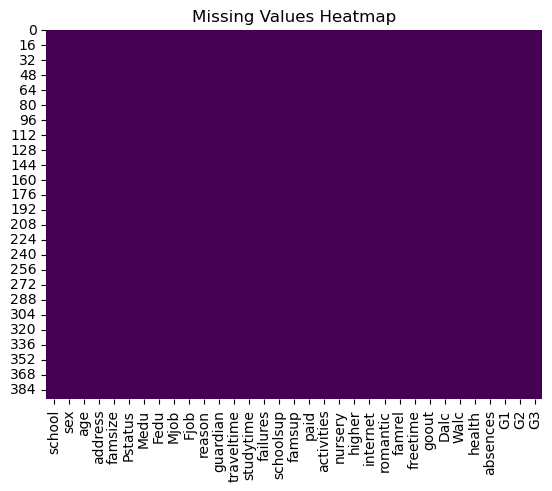

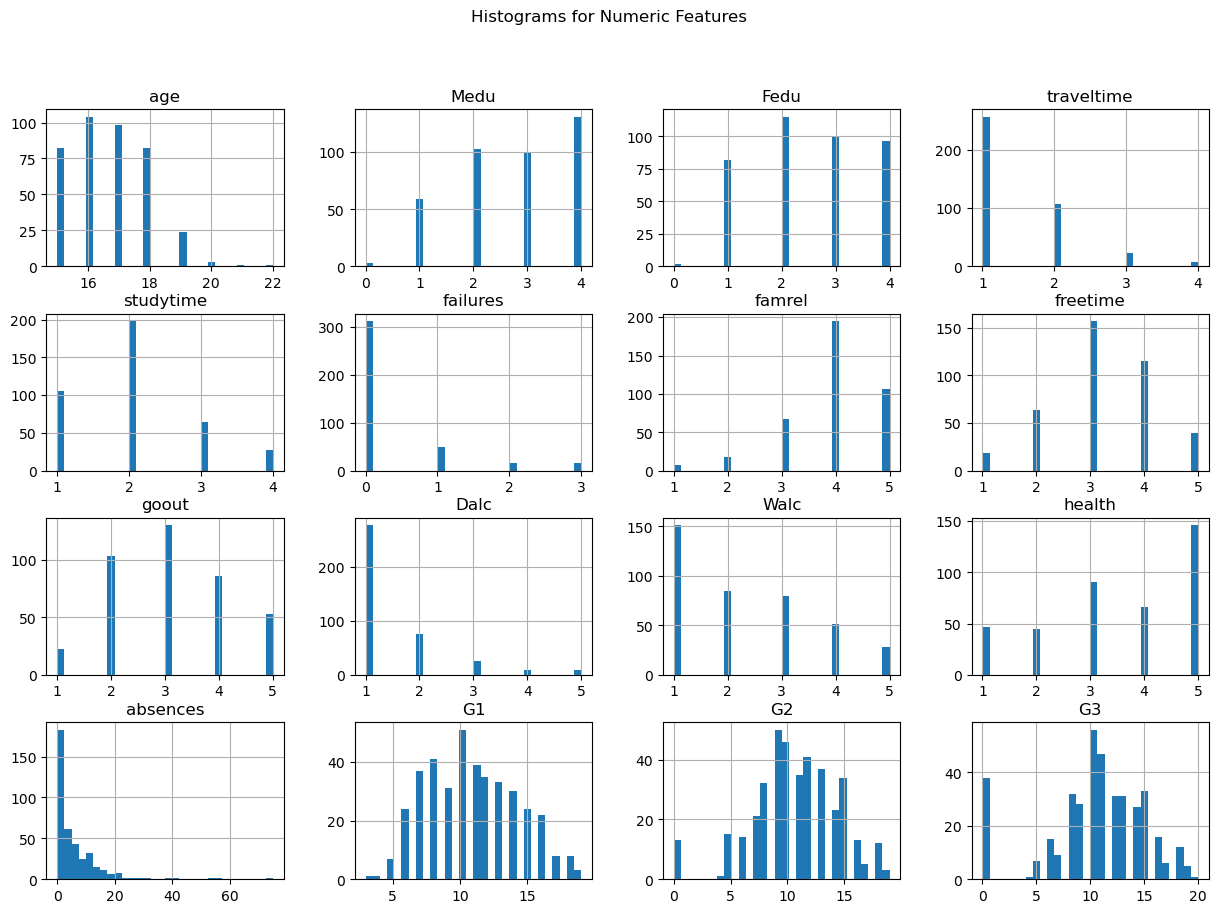

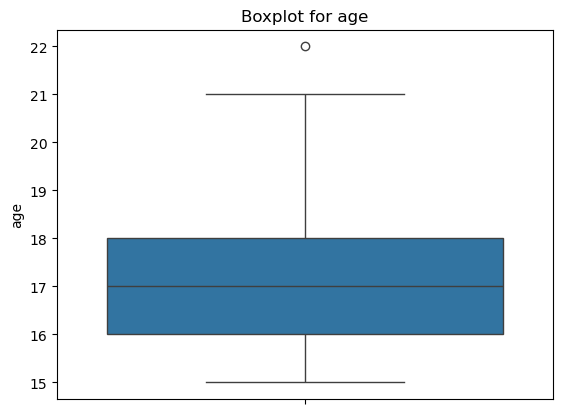

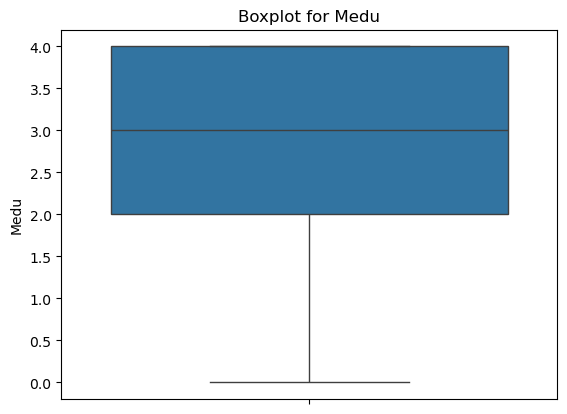

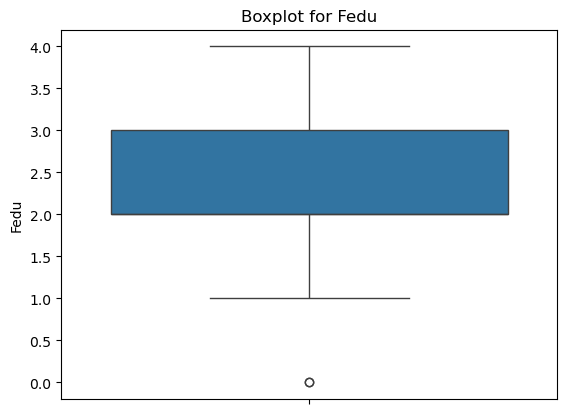

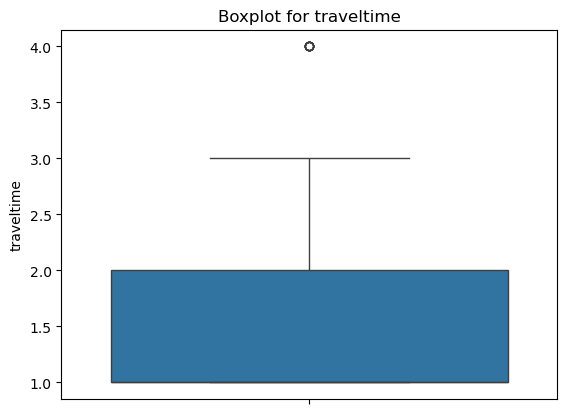

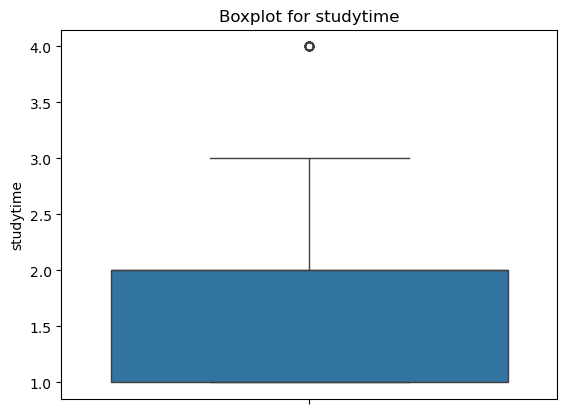

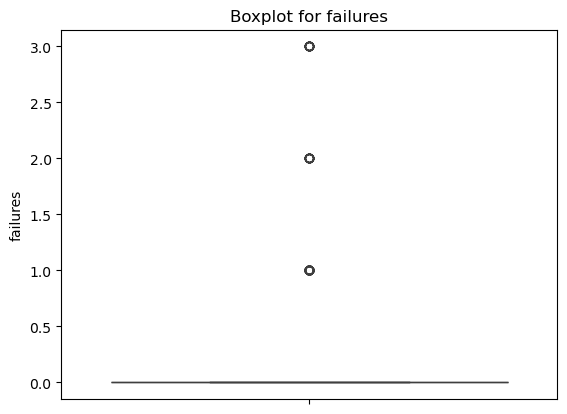

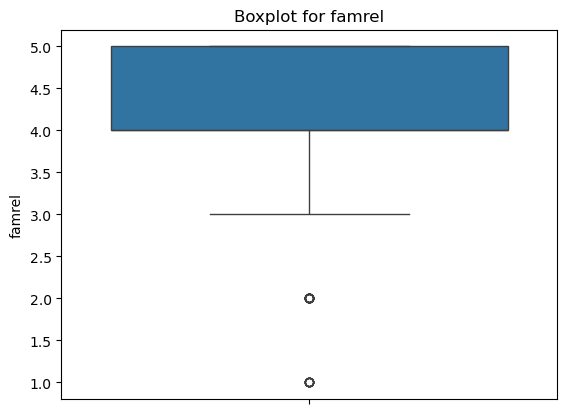

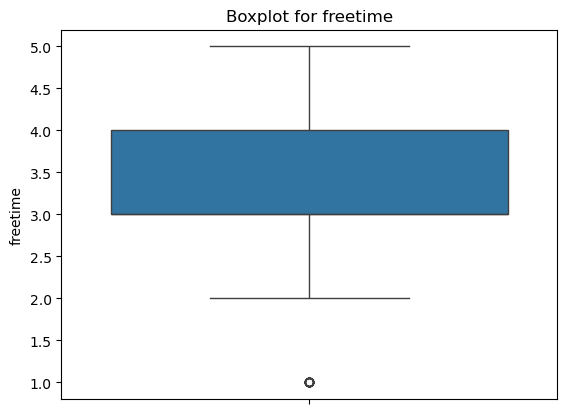

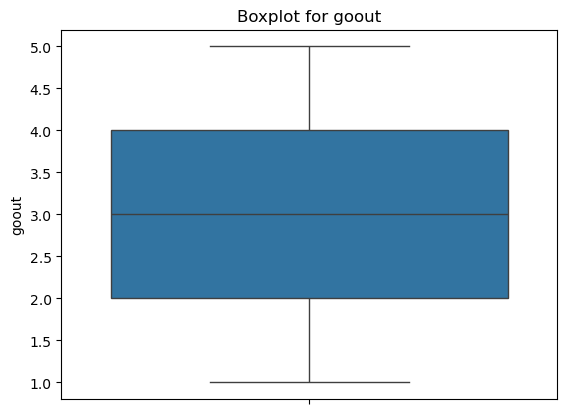

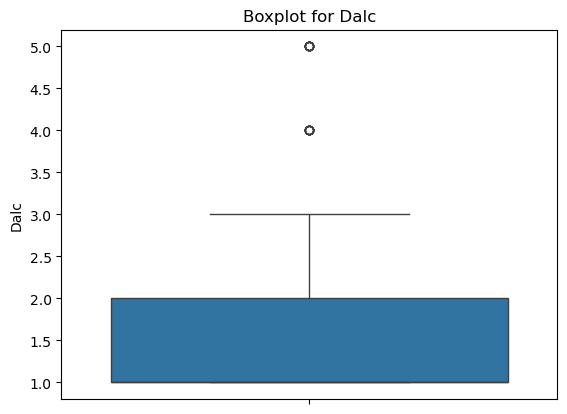

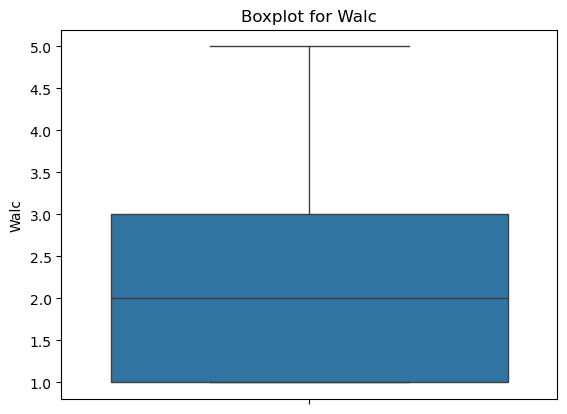

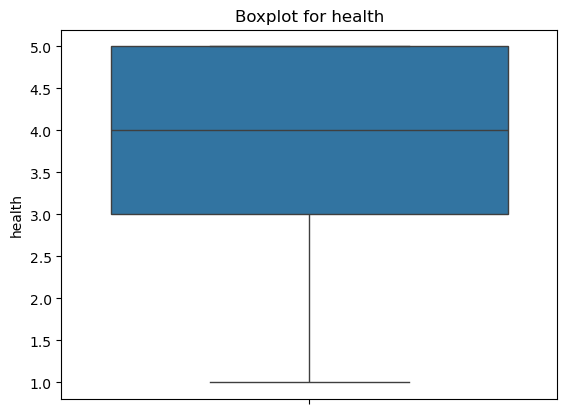

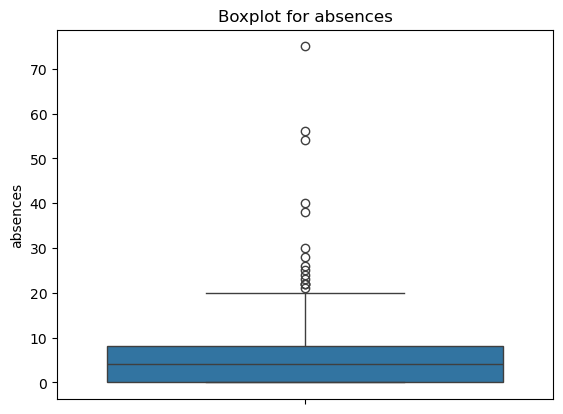

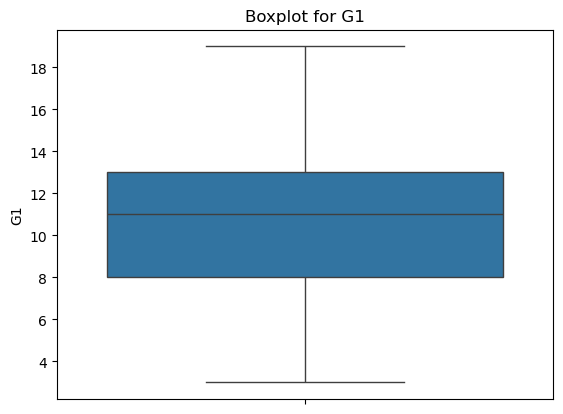

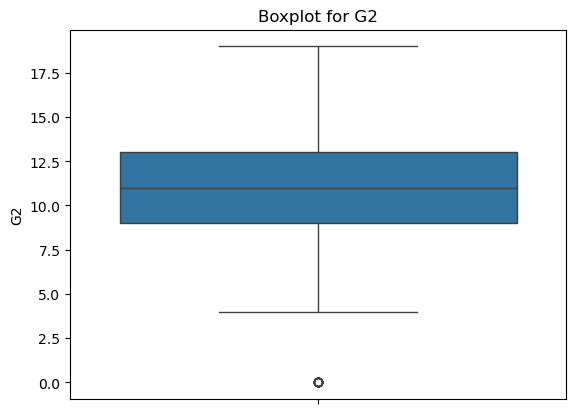

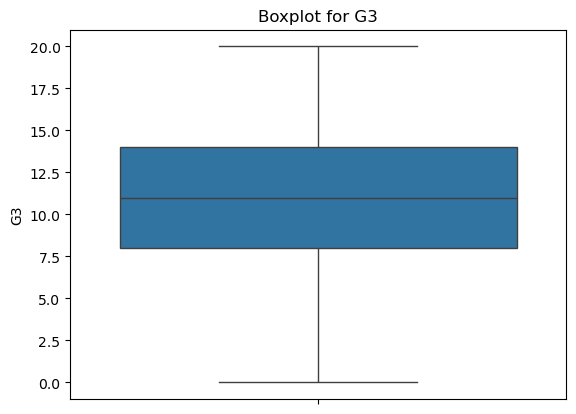

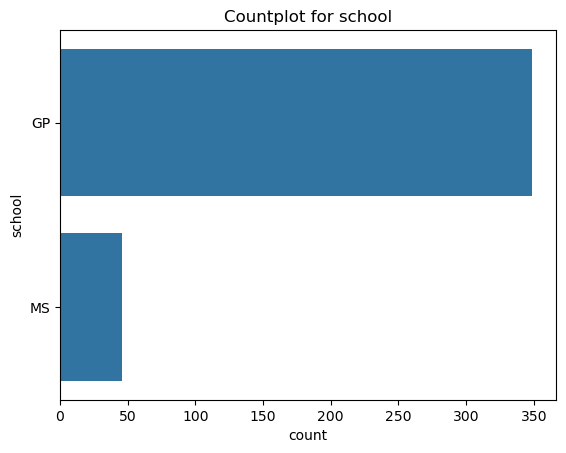

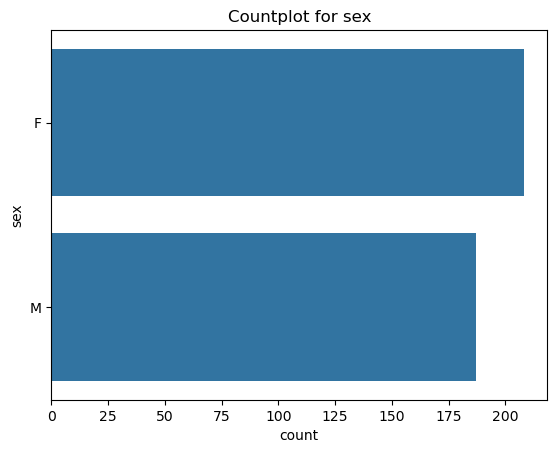

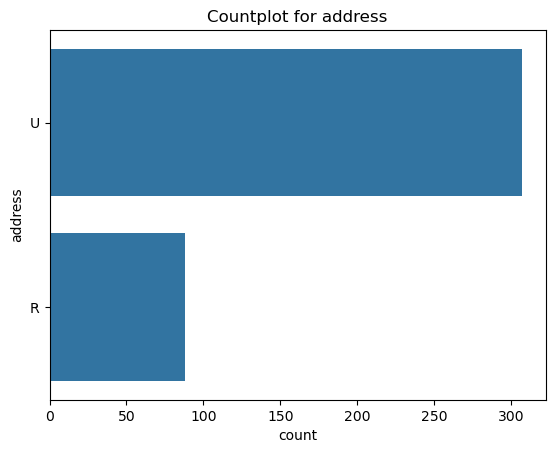

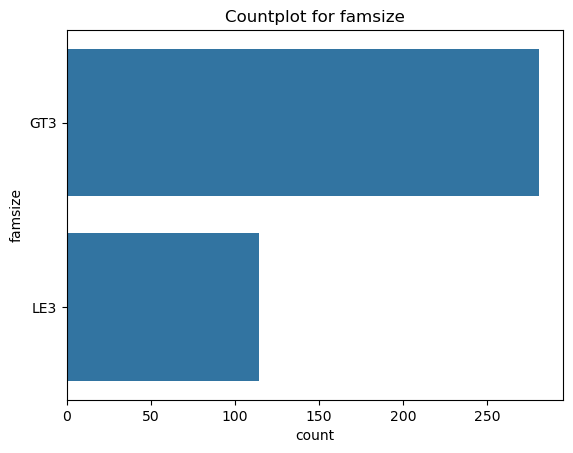

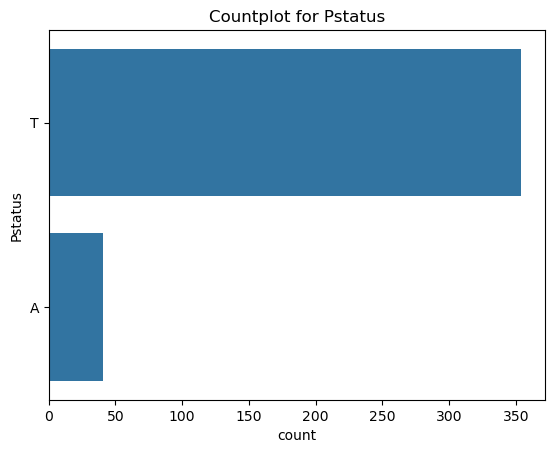

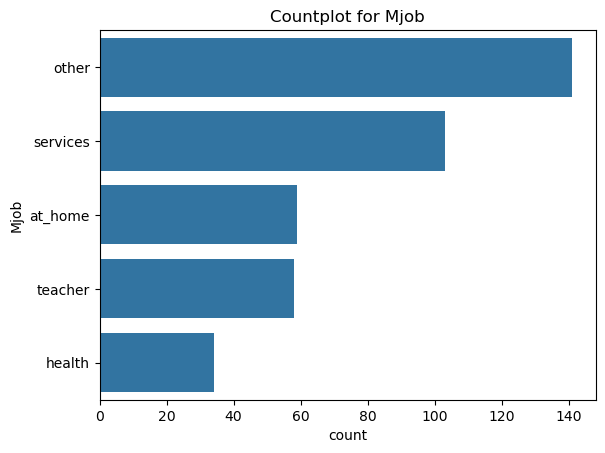

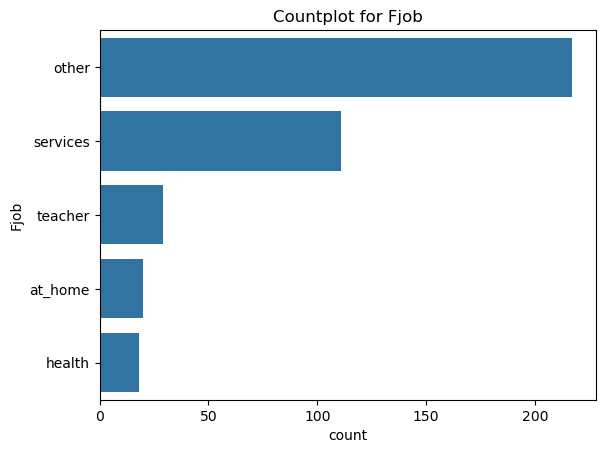

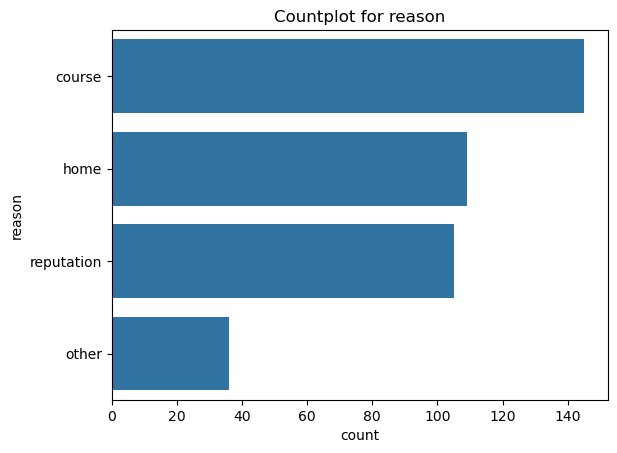

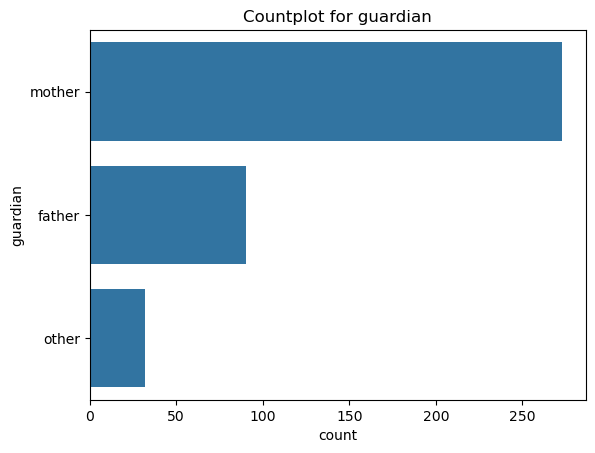

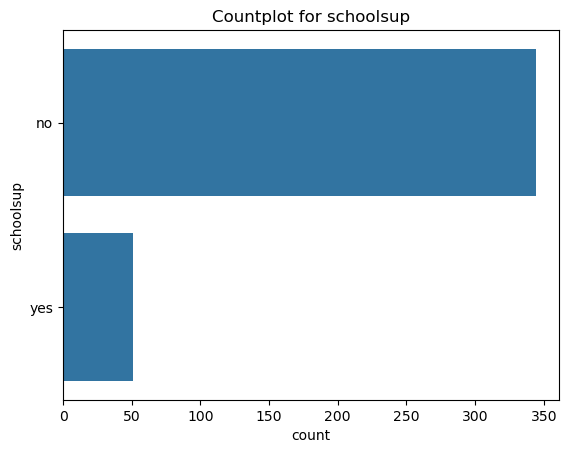

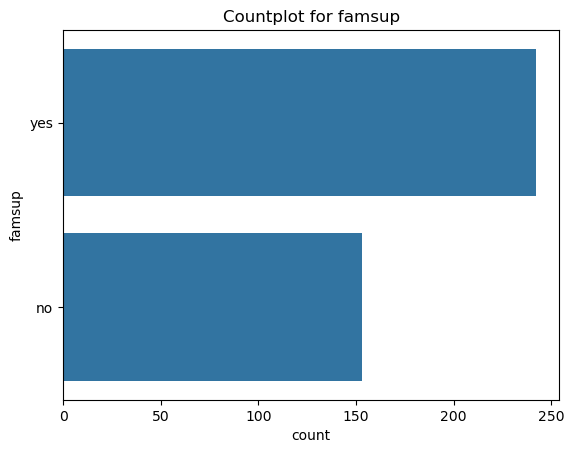

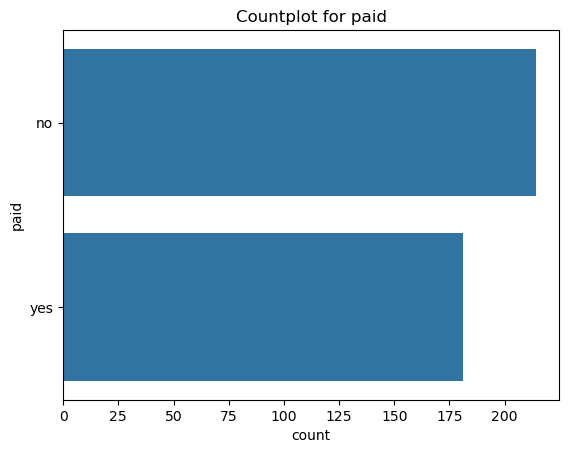

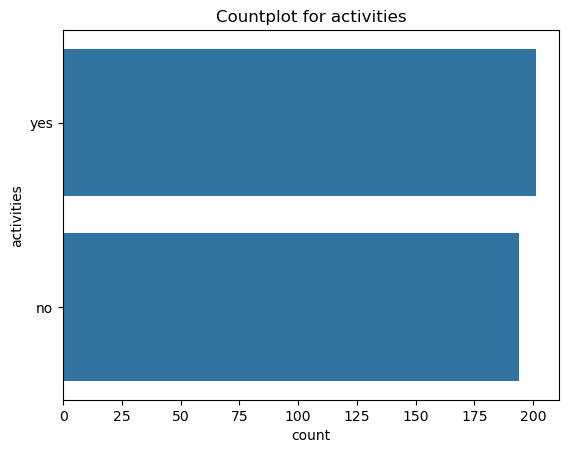

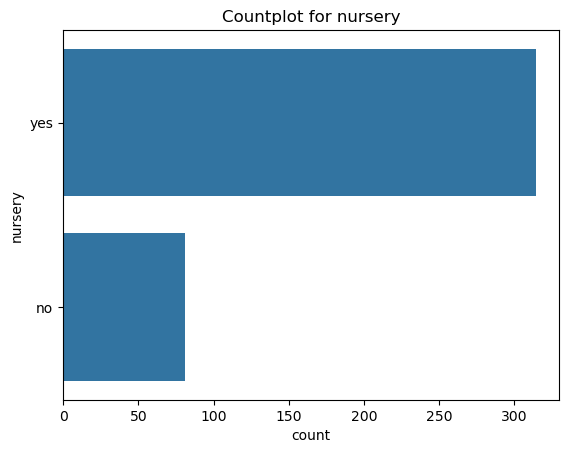

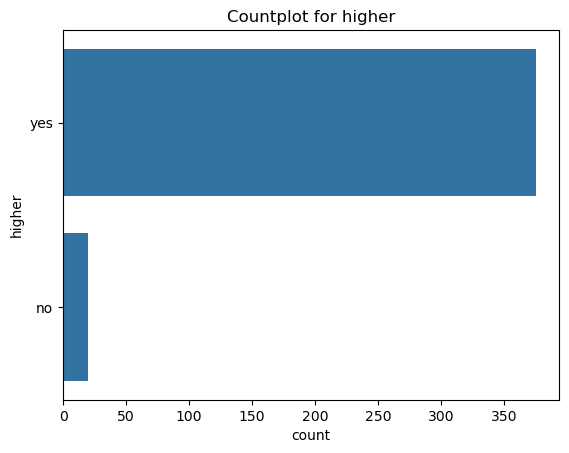

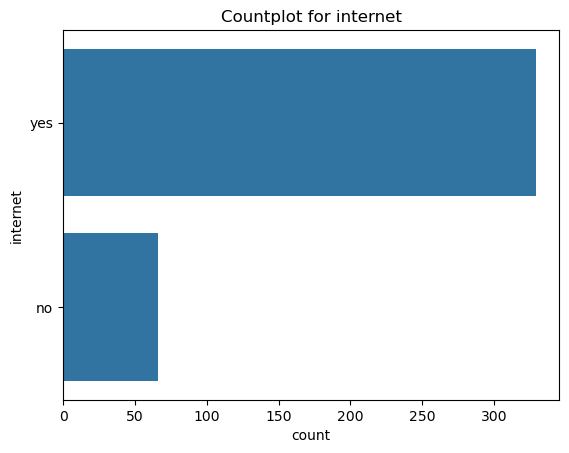

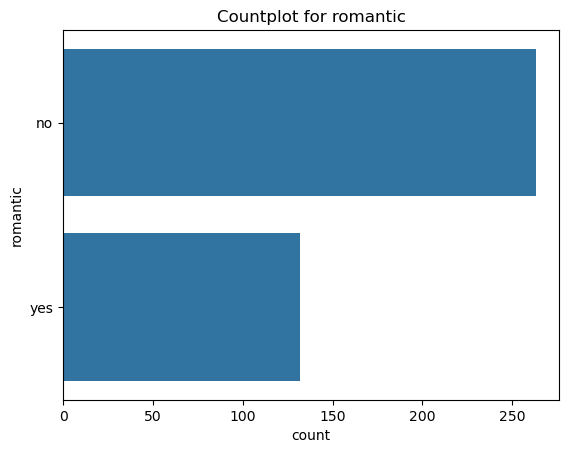

ValueError: could not convert string to float: 'GP'

<Figure size 1000x600 with 0 Axes>

In [27]:
# Multiple Linear Regression

# 1.Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns



# 2.Importing the dataset
dataset1 = pd.read_csv('C:/Tejinder/student-mat.csv', sep=';', header=0)  # Header is in the first row
dataset2 = pd.read_csv('C:/Tejinder/student-por.csv', sep=';', header=0)  # Header is in the first row

X = dataset1.iloc[:, :-1].values
y = dataset1.iloc[:, -1].values
# print(X) 
# print(dataset1.columns)
# Count the number of rows
# row_count = dataset1.shape[0]  # Number of rows
#print(f"Number of rows: {row_count}")
#dataset1.to_csv('C:/Tejinder/SDS/Student Performance Analysis/student+performance/student/output.csv', index=False)

# 3.Encoding categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# Features to encode
categorical_features_indices = [ 0,1,3,4,5,8,9,10,11,15,16,17,18,19,20,21,22]
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_features_indices)], remainder='passthrough')
X = np.array(ct.fit_transform(X))
# print(X)
###########################################################################################################


# Display basic information about the dataset
print("Dataset Info:")
print(dataset1.info())

print("\nFirst 5 Rows of Data:")
print(dataset1.head())

print("\nSummary Statistics:")
print(dataset1.describe())

print("\nCheck for Missing Values:")
print(dataset1.isnull().sum())

# Check for duplicate rows
print("\nNumber of Duplicate Rows:")
print(dataset1.duplicated().sum())

# Visualize missing values (optional)
sns.heatmap(dataset1.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Univariate Analysis
# Distribution of numerical features
dataset1.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms for Numeric Features")
plt.show()

# Box plots for detecting outliers in numerical features
for column in dataset1.select_dtypes(include=np.number).columns:
    sns.boxplot(dataset1[column])
    plt.title(f"Boxplot for {column}")
    plt.show()

# Count plots for categorical features
for column in dataset1.select_dtypes(include='object').columns:
    sns.countplot(y=dataset1[column], order=dataset1[column].value_counts().index)
    plt.title(f"Countplot for {column}")
    plt.show()

# Bivariate Analysis
# Correlation heatmap for numeric features
plt.figure(figsize=(10, 6))
sns.heatmap(dataset1.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Pair plot for visualizing relationships between numerical features
sns.pairplot(dataset1)
plt.suptitle("Pairplot", y=1.02)
plt.show()

# Categorical vs Numeric Analysis
categorical_columns = dataset1.select_dtypes(include='object').columns
numeric_columns = dataset1.select_dtypes(include=np.number).columns

for cat_col in categorical_columns:
    for num_col in numeric_columns:
        sns.boxplot(x=dataset1[cat_col], y=dataset1[num_col])
        plt.title(f"{num_col} by {cat_col}")
        plt.show()

# Save processed data for further analysis
dataset1.to_csv('processed_data.csv', index=False)










###########################################################################################################
# 4.Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


# row_count = X_train.shape[0]  # Number of rows
# print(f"Number of rows: {row_count}")

# Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))





